In [5]:
import os
import numpy as np
import tensorflow.keras
from skimage import io

In [51]:
def process_data(dir='data/train'):
    print("start processing data...")
    classes = os.listdir(dir)
    train_data_classes = {c: os.path.join(dir, c) for c in classes}
    train_X = []
    train_y = []

    for i, c in enumerate(train_data_classes):
        class_dir = dir + "/" + c + "/"
        for image in os.listdir(class_dir):
            # print(class_dir + image)
            im = io.imread(class_dir + image,1).reshape([256,256,1])
            im = np.asarray(im/255)
            im = im.astype(int)

            train_X.append(im)
            train_y.append(i)

    train_X = np.asarray(train_X)
    train_y = np. asarray(train_y)
    train_y = one_hot(train_y)
    
    print("finished processing data...")
    return train_X, train_y


In [7]:
import tensorflow as tf

def one_hot(y):
    return np.array(tf.keras.utils.to_categorical(y, 8))

In [8]:
train_X, train_y = process_data(dir='data/train')

start processing data...
finished processing data...


In [52]:
valid_X, valid_y = process_data(dir='data/validation')

start processing data...
finished processing data...


In [10]:
test_X, test_y = process_data(dir='data/test')

start processing data...
finished processing data...


In [11]:
# print first image
image = test_X[0]
print(len(test_X), test_X.shape, image.shape)

4000 (4000, 256, 256, 1) (256, 256, 1)


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,  Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
import tensorflow_addons as tfa

In [16]:
batch_size = 64
epochs = 20
num_classes = 8

In [28]:
def CNN(train_X, train_y):

    CNN_model = Sequential()
    CNN_model.add(Conv2D(16, kernel_size=(5, 5), activation='linear',input_shape=(256, 256, 1), padding='same'))
    CNN_model.add(LeakyReLU(alpha=0.1))
    CNN_model.add(MaxPooling2D((2, 2), padding='same'))
    CNN_model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
    CNN_model.add(LeakyReLU(alpha=0.1))
    CNN_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    CNN_model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
    CNN_model.add(LeakyReLU(alpha=0.1))
    CNN_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    CNN_model.add(Flatten())
    CNN_model.add(Dense(128, activation='linear'))
    CNN_model.add(LeakyReLU(alpha=0.1))
    CNN_model.add(Dense(num_classes, activation='softmax'))

    CNN_model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.optimizers.Adam(),
                      metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tfa.metrics.F1Score(num_classes)])
    
    CNN_model.summary()
    
    return CNN_model
   

In [29]:
CNN_model = CNN(train_X, train_y)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 256, 256, 16)      416       
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 256, 256, 16)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 64)      9280      
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                 

In [30]:
trained = CNN_model.fit(train_X, train_y, batch_size=batch_size, epochs=epochs, verbose=1,
                            validation_data=(valid_X, valid_y))

Epoch 1/20
125/125 [==============================] - 19s 110ms/step - loss: 0.2747 - precision_5: 0.9577 - recall_5: 0.8797 - f1_score: 0.9118 - val_loss: 0.4391 - val_precision_5: 0.9052 - val_recall_5: 0.9005 - val_f1_score: 0.9023
Epoch 2/20
125/125 [==============================] - 13s 101ms/step - loss: 0.0119 - precision_5: 0.9962 - recall_5: 0.9962 - f1_score: 0.9962 - val_loss: 0.3372 - val_precision_5: 0.9313 - val_recall_5: 0.9257 - val_f1_score: 0.9271
Epoch 3/20
125/125 [==============================] - 13s 102ms/step - loss: 5.8723e-04 - precision_5: 0.9999 - recall_5: 0.9999 - f1_score: 0.9999 - val_loss: 0.3113 - val_precision_5: 0.9503 - val_recall_5: 0.9462 - val_f1_score: 0.9477
Epoch 4/20
125/125 [==============================] - 13s 102ms/step - loss: 7.5086e-05 - precision_5: 1.0000 - recall_5: 1.0000 - f1_score: 1.0000 - val_loss: 0.3108 - val_precision_5: 0.9491 - val_recall_5: 0.9457 - val_f1_score: 0.9469
Epoch 5/20
125/125 [==============================] 

In [47]:
test_eval = CNN_model.evaluate(test_X, test_y, verbose=0)

In [48]:
print('CNN Loss: ', test_eval[0])
print('CNN Precision: ', test_eval[1])
print('CNN Recall: ', test_eval[2])
print('CNN F1-score: ', np.average(test_eval[3]))

CNN Loss:  0.42304205894470215
CNN Precision:  0.9416624903678894
CNN Recall:  0.9402499794960022
CNN F1-score:  0.94027925


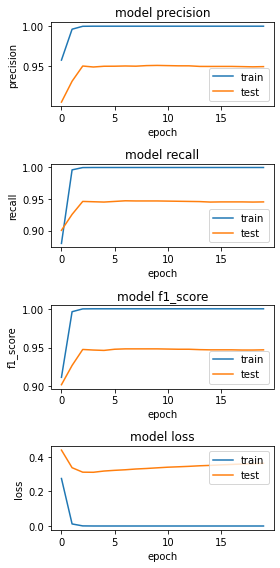

In [46]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(4,8)
plt.subplot(4,1,1)
plt.plot(trained.history['precision_5'])
plt.plot(trained.history['val_precision_5'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(4,1,2)
plt.plot(trained.history['recall_5'])
plt.plot(trained.history['val_recall_5'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(4,1,3)
plt.plot(np.average(trained.history['f1_score'], axis=1))
plt.plot(np.average(trained.history['val_f1_score'], axis=1))
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(4,1,4)
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [ ]:
CNN_model = CNN(train_X, train_y)

In [ ]:
trained = CNN_model.fit(train_X, train_y, batch_size=batch_size, epochs=5, verbose=1,
                            validation_data=(valid_X, valid_y))

In [ ]:
test_eval = CNN_model.evaluate(test_X, test_y, verbose=0)
print("Loss,  Precision,   Recall")
print(test_eval)